** Here we will be exploring the Automobile datase from the UCI Machine Learning repository. A copy of the data is provided in the data folder. The data as well as descriptions was obtained from: https://archive.ics.uci.edu/ml/datasets/automobile **

In this example, I will be attempting to predict the prices of these cars

This example will take you through:

1. Data loading and preprocessing (that includes data cleaning and selection)

2. Handling of categorical data

3. Splitting dataset into training and test datasets

4. Basic Machine Learning modeling

For a more indepth beginner ML example (using the famous Titanic dataset) please see https://www.kaggle.com/sramml/simple-tutorial-for-beginners


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline

pd.options.display.max_columns = 99

** 1. Data loading and preprocessing **

In [4]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
autos = pd.read_csv('imports-85.data',names=cols,na_values='?')

In [5]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Most cols are self explanitory. However there are two that, unless you are in the car insurance buisness won't know: 
- Symboling: 
      corresponds to the degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.
- Normalized loss:
      is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

In [6]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-

In [7]:
autos.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

There are a few NaNs, and with mainly numeric columns. intead of discarding these, we chall replace the NaNs with the mean values of each column. there seem to be 4 without the actual price. We can either replace the price with the mean vlue or remove these 4 cars. I prefer to remove them, as using the mean will greatly skew the results if we want to predict the price.

In [8]:
autos = autos.dropna(subset=['price'])

In [9]:
autos = autos.fillna(autos.mean())

In [10]:
# Confirm that there's no more missing values!
autos.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#There seem to be two rows in num-of-doors with NaN. looking at the column, this describes the number of doors as a string i.e. two, four ...

In [11]:
print('Unique values in "num-of-doors" \n{}'.format(autos['num-of-doors'].unique()))
autos[autos['num-of-doors'].isnull()]

Unique values in "num-of-doors" 
['two' 'four' nan]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


Hmmm .... Since it is a single column, I'll drop it as there may be a weak correlation between the number of doors ... I may be wrong, but it's better than removeing the columns for these cars.

In [12]:
autos = autos.drop('num-of-doors',axis=1)
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


** Data exploration **

In [13]:
#number of unique car make
len(autos['make'].unique())

22

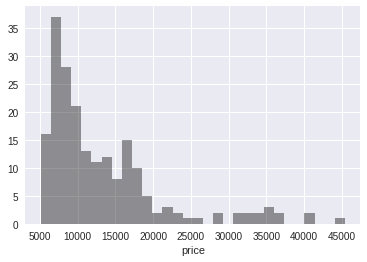

In [14]:
sns.distplot(autos['price'],kde=False,bins=30,color='k')

** Now that we have the final datasets now is time to prepare the datasets for machine learning. You mave noticed that there are a few categorical features. We will have to convert them into a dummy numerical value. **

In [40]:
numerical_cols = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size',
                  'bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg','price']

numerical_autos = autos[numerical_cols]
numerical_autos.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


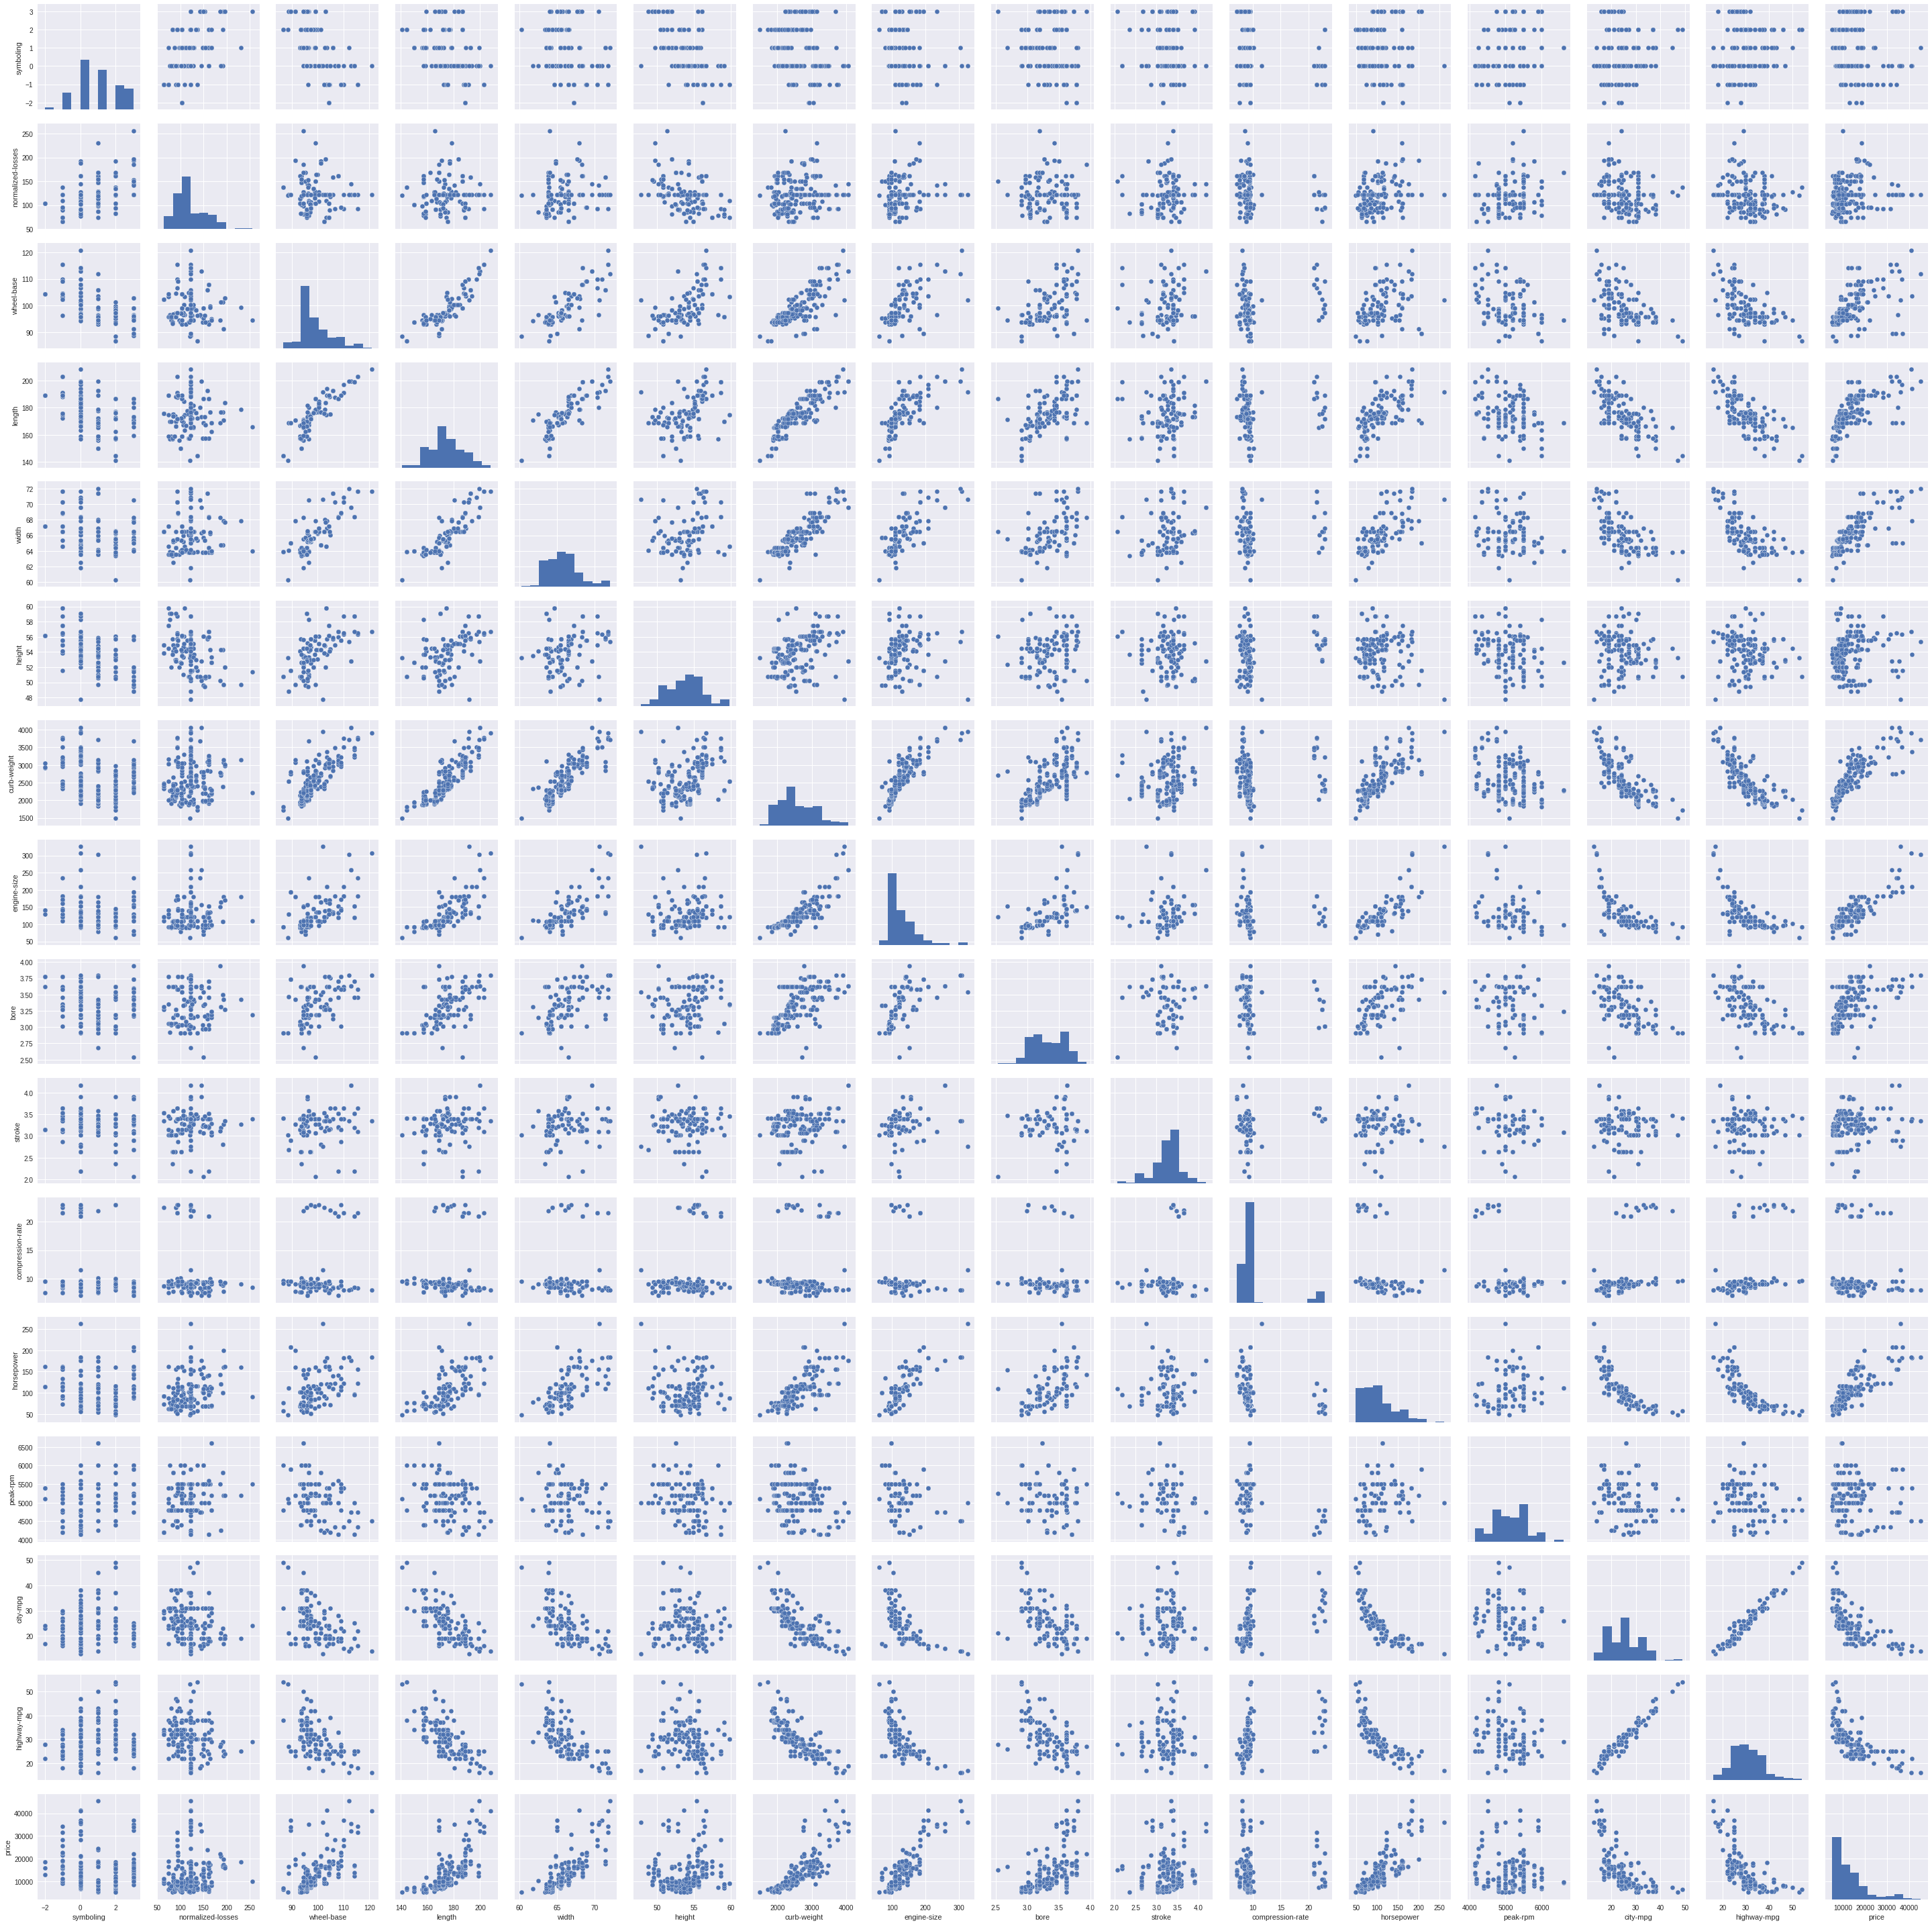

In [41]:
sns.pairplot(numerical_autos)

hmmm there are a lot of corelations with price. From the plot we see that mpg seems to correlate well with price as well as length of car. Also I'm sure the make/brand of the car has something to do with price. So we'll select these features to build our price model.

However, notice that the make column comprises categorical information. To fit a modelon thos we need to first convert this to binary data which scikit learn can use. luckily there is a class for this in pandas called get_dummies

In [43]:
dummy = pd.get_dummies(categorical_autos['make'])
auto_features = pd.concat([autos['city-mpg'],autos['highway-mpg'],dummy],axis=1)

In [44]:
auto_features.head()

,city-mpg,highway-mpg,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,24,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18,22,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As you can see thee car makes have been converted to binary data, with a column for each make.

**Now we split the dataset into a training and a test set. the Training set is where we train our data and the test is well to see how well we have fitted the modle that we trained on **

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = auto_features
y = autos['price']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [47]:
print('Shape of the Training set \n X = {}, y = {}'.format(X_train.shape,y_train.shape))
print('Shape of the test set \n X = {}, y = {}'.format(X_test.shape,y_test.shape))

Shape of the Training set 
 X = (150, 24), y = (150,)
Shape of the test set 
 X = (51, 24), y = (51,)


** Now it is time to train some ML models. The steps are: **
1. Instantiate the model

2. fit the modle to the training data

3. obtain predictions from the model using the test data

4. compare the results

** Below we will use 5 different models **

** Fist we will use Logistic Regression **

In [48]:
# the model we will use is the logistic regression
from sklearn.linear_model import LogisticRegression

In [49]:
print('-----Logistic Regression-----')
lg = LogisticRegression()
lg.fit(X_train, y_train)

-----Logistic Regression-----


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

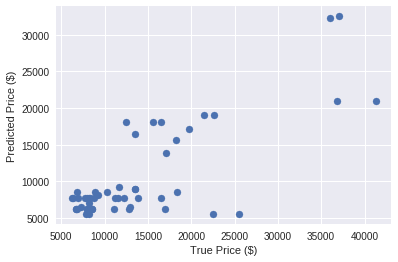

In [50]:
y_pred_lreg = lg.predict(X_test)

plt.scatter(y_test,y_pred_lreg)
plt.xlabel('True Price ($)')
plt.ylabel('Predicted Price ($)')

In [51]:
print('RMSE = ${}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lreg))))

RMSE = $6344.340924375509


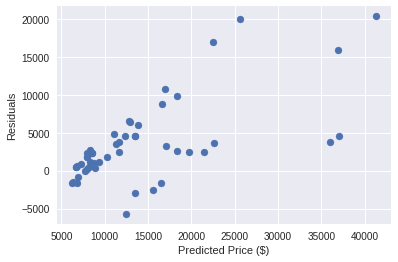

In [52]:
plt.scatter(y_test,(y_test-y_pred_lreg))
plt.ylabel('Residuals')
plt.xlabel('Predicted Price ($)')

** Next: K-Nearest-Neighbors **

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

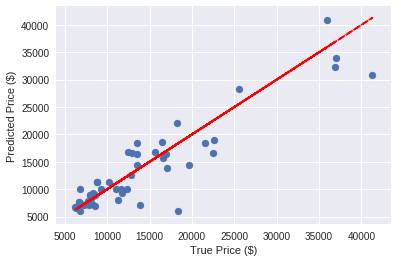

In [81]:
y_pred_knn = knn.predict(X_test)

plt.plot(y_test,y_test,'r--',label='line of equity')
plt.scatter(y_test,y_pred_knn)
plt.xlabel('True Price ($)')
plt.ylabel('Predicted Price ($)')

RMSE = $3456.504201374222


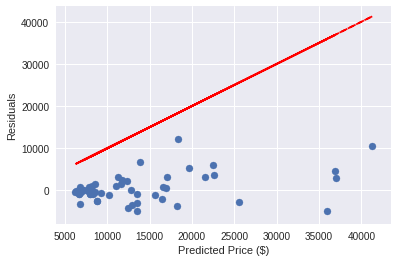

In [79]:
print('RMSE = ${}'.format(np.sqrt(mean_squared_error(y_test,y_pred_knn))))
plt.plot(y_test,y_test,'r--',label='line of equity')
plt.scatter(y_test,(y_test-y_pred_knn))
plt.ylabel('Residuals')
plt.xlabel('Predicted Price ($)')

** Next: Random Forest **

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc = RandomForestClassifier(n_estimators=100)

In [59]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

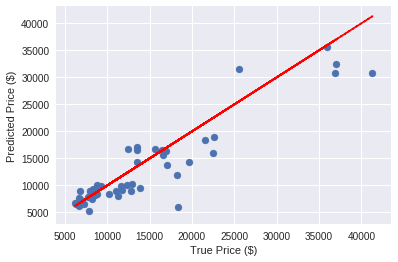

In [78]:
y_pred_rfc = rfc.predict(X_test)
plt.plot(y_test,y_test,'r--',label='line of equity')
plt.scatter(y_test,y_pred_rfc)
plt.xlabel('True Price ($)')
plt.ylabel('Predicted Price ($)')

RMSE = $3531.4594272445647


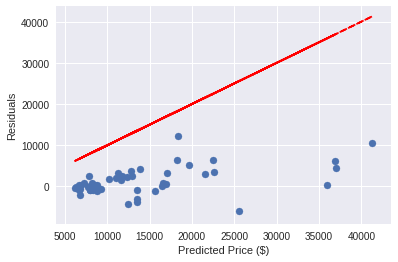

In [76]:
print('RMSE = ${}'.format(np.sqrt(mean_squared_error(y_test,y_pred_rfc))))
plt.plot(y_test,y_test,'r--',label='line of equity')
plt.scatter(y_test,(y_test-y_pred_rfc))
plt.ylabel('Residuals')
plt.xlabel('Predicted Price ($)')

** Next: Linear Regression **

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

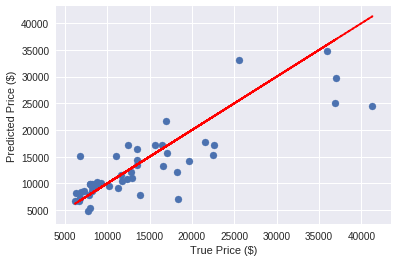

In [74]:
y_pred_lr = lm.predict(X_test)
plt.plot(y_test,y_test,'r--',label='line of equity')
plt.scatter(y_test,y_pred_lr)
plt.xlabel('True Price ($)')
plt.ylabel('Predicted Price ($)')

RMSE = $4571.751249410331


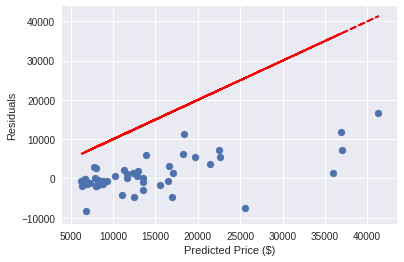

In [73]:
print('RMSE = ${}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lr))))
plt.plot(y_test,y_test,'r--',label='line of equity')
plt.scatter(y_test,(y_test-y_pred_lr))
plt.ylabel('Residuals')
plt.xlabel('Predicted Price ($)')

** The final model we will try is the Support Vector Classifier with alinear kernel **

In [82]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')

In [70]:
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

RMSE = $7519.480852198378


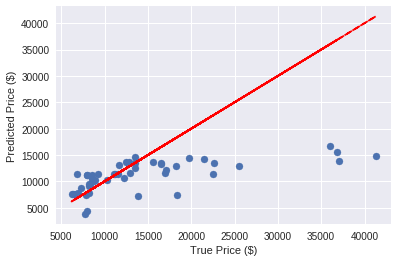

In [75]:
print('RMSE = ${}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svr))))
plt.scatter(y_test,y_pred_svr)
plt.plot(y_test,y_test,'r--',label='line of equity')
plt.xlabel('True Price ($)')
plt.ylabel('Predicted Price ($)')

The Root Mean Square Error for the different models are:

- Logistic Regression = $6344

- KNeighborsClassifier = $3456

- RandomForestClassifier = $3531

- Linear Regression = $4571

- Support Vector Classifier = $7519

** Can you do better?? The best I got was $1495 (not shown here)**
